In [55]:
#import packages
from nba_api.stats.static import players
players = players.get_players()
from nba_api.stats.static import teams
teams = teams.get_teams()
from nba_api.stats.endpoints import shotchartdetail
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from scipy.stats import binned_statistic_2d
from bokeh.plotting import figure
from math import pi
import urllib.request
from datetime import date

In [64]:
players_df = pd.DataFrame.from_dict(players)
teams_df = pd.DataFrame.from_dict(teams)

In [65]:
player = 'Ja Morant'
team = 'Grizzlies'

player_id = players_df.loc[players_df.full_name == player, 'id'].reset_index(drop=True).iloc[0].astype(str)
team_id = teams_df.loc[teams_df.nickname == team, 'id'].iloc[0].astype(str)
team_abb = teams_df.loc[teams_df.nickname == team, 'abbreviation'].iloc[0]


shot_detail = shotchartdetail.ShotChartDetail(player_id=player_id, 
                                              team_id=team_id,
                                              context_measure_simple = 'FGA',     
                                              season_type_all_star='Regular Season')
                                              
shot_df = shot_detail.get_data_frames()[0]
shot_df = shot_df[shot_df["GAME_DATE"].between('20211020', '99999999', inclusive='both')]
#shot_df

In [69]:
quarter4 = shot_df[shot_df.PERIOD == 4]
quarter4make = quarter4[quarter4.SHOT_MADE_FLAG == 1]
quarter4makeclutch = quarter4make[quarter4make.MINUTES_REMAINING == 0]
#plt.figure(figsize=(12,11))
#plt.scatter(quarter4makeclutch.LOC_X, quarter4makeclutch.LOC_Y)
#plt.xlim(-300,300)
#plt.ylim(-100,500)
#plt.axis('off')
#plt.show()

quarter4 = shot_df[shot_df.PERIOD == 4]
quarter4miss = quarter4[quarter4.SHOT_MADE_FLAG == 0]
quarter4missclutch = quarter4miss[quarter4miss.MINUTES_REMAINING == 0]
#plt.figure(figsize=(12,11))
#plt.scatter(quarter4missclutch.LOC_X, quarter4missclutch.LOC_Y)
#plt.xlim(-300,300)
#plt.ylim(-100,500)
#plt.axis('off')
#plt.show()

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

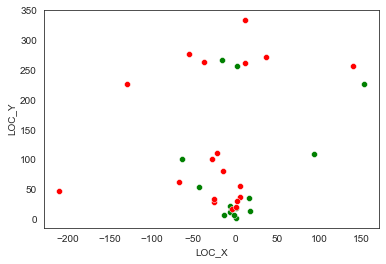

In [70]:
#morant = shot_df('Ja Morant', 'Memphis Grizzlies')
sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4makeclutch, color='green')
sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4missclutch, color='red')

In [71]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court
    
    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color='red', fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def draw_background(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court
    background = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color='black', fill=True)

    background_elements = [background]

    for element in background_elements:
        ax.add_patch(element)

    return ax

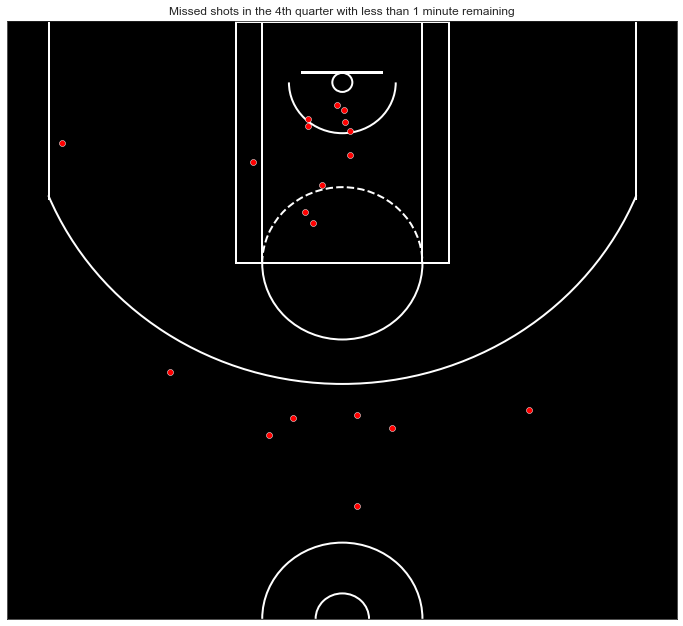

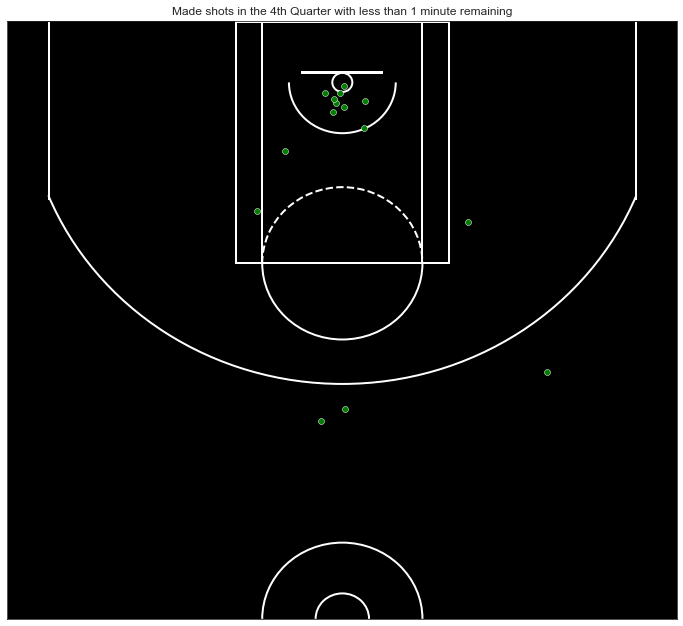

In [72]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_background(outer_lines=False, color='black')
sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4missclutch, color='red', zorder = 2).set(xlabel=None, ylabel=None, title="Missed shots in the 4th quarter with less than 1 minute remaining")
draw_court(outer_lines=False, color="white")
plt.xlim(-251,250.5)
plt.ylim(422.5, -48.5)
plt.tick_params(labelbottom=False, labelleft=False)

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_background(outer_lines=False, color='black')
sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4makeclutch, color='green', zorder = 2).set(xlabel=None, ylabel=None, title="Made shots in the 4th Quarter with less than 1 minute remaining")
draw_court(outer_lines=False, color="white")
plt.xlim(-251,250.5)
plt.ylim(422.5, -48.5)
plt.tick_params(labelbottom=False, labelleft=False)

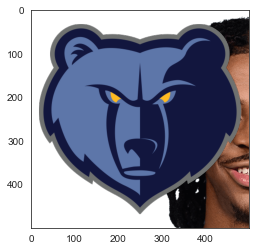

In [62]:
def get_player_img(player_id):
    player_url = "https://cdn.nba.com/headshots/nba/latest/1040x760/"+player_id+".png"
    player_img_file = player_id + ".png"
    player_img = plt.imread(urllib.request.urlretrieve(player_url, player_img_file)[0])
    return plt.imshow(player_img)

get_player_img(player_id)

def get_team_img(team_abb):
    team_url = "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nba/500/"+team_abb+".png"
    team_img_file = team_abb + ".png"
    team_img = plt.imread(urllib.request.urlretrieve(team_url, team_img_file)[0])
    return plt.imshow(team_img)

get_team_img(team_abb)

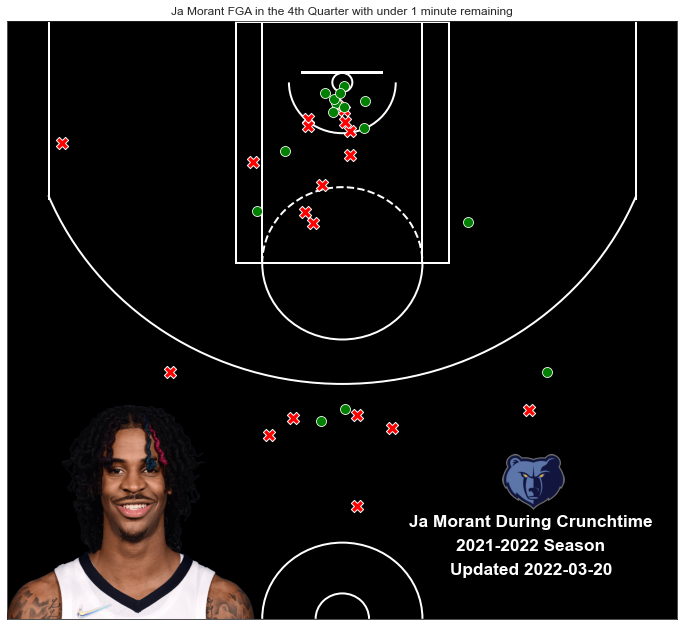

In [73]:
today = date.today()
today = str(today)

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
player_img = plt.imread(player_id + '.png')
team_img = plt.imread(team_abb + ".png")

draw_background(outer_lines=False, color='black')

plt.imshow(player_img, extent=[-260, -50, 250, 423], aspect ='auto', origin='lower',zorder=2)
plt.imshow(team_img, extent=[118, 168, 290, 340], aspect='auto', origin='lower', zorder=1)

sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4missclutch, color='red', marker='X', s=150, zorder = 2).set(xlabel=None, ylabel=None, title=player+' '+'FGA in the 4th Quarter with under 1 minute remaining')
sns.scatterplot(x='LOC_X', y='LOC_Y', data = quarter4makeclutch, color='green', s=100, zorder = 2).set(xlabel=None, ylabel=None)

plt.text(50,350, player+' '+'During Crunchtime', size='xx-large', color='white', weight='extra bold',
         bbox=dict(facecolor='lightblue', alpha=0))
plt.text(85,369, "2021-2022 Season", size='xx-large', color='white', weight='extra bold',
         bbox=dict(facecolor='lightblue', alpha=0))
plt.text(81,388, "Updated " + today, size='xx-large', color='white', weight='extra bold',
         bbox=dict(facecolor='lightblue', alpha=0))

draw_court(outer_lines=False, color="white")

plt.xlim(-251,250.5)
plt.ylim(422.5, -48.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()